# Multi-messenger Gravitational Wave Astronomy

In this activity we are going to explore the future of multi-messenger gravitational wave astronomy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad 

## LISA super-massive black hole binaries

[LISA](https://www.lisamission.org/articles/lisa-mission/lisa-mission-gravitational-universe) is a future gravitational wave detector from space. It will detect sources at lower frequencies than current ground-based detectors, around the milli-Hertz band. 

Among many cool sources, LISA will detect super-massive black hole binaries. These black holes are more than a million times heavier than the Sun.

In the plot below you can see the three different types of gravitational wave detector sensitivities as a function of frequency and their possible sources:

<img src='https://upload.wikimedia.org/wikipedia/commons/a/af/Gravitational-wave_detector_sensitivities_and_astrophysical_gravitational-wave_sources.png' alt='Alt text' title='Title text' />

_Note:_ PTA means pulsar timing array. They aim at detecting gravitational waves from the distortions of the timing of known milli-second pulsars in the galaxy. This is very cool science. I recommend investigating about them!

## Super-massive black hole catalogs

We are going to work with three different catalogs of super-massive black holes with multi-messenger signals. Each catalog correspond to a different formation model (this is quite technical, but if you want to research the article explaining them is [this one](https://arxiv.org/abs/1601.07112)). 

These catalogs provide a list of luminosity distances, relative errors (obtained from the GW) and redshifts (obtained from the electromagnetic signal). 

_Note:_ this is simulated data since LISA is still far from launching. It will do it in $\sim$2034. Maybe you will be leading the mission by that time :)

In [3]:
catalog1 = np.genfromtxt('smbh_lisa_catalogs/heavy_no_delays.txt')
dL_catalog1 = catalog1[:,0] #luminosity distance in Mpc
edL_catalog1 = catalog1[:,1] # relative error in luminosity distance
z_catalog1 = catalog1[:,2] # redshift

catalog2 = np.genfromtxt('smbh_lisa_catalogs/heavy_Q3.txt')
dL_catalog2 = catalog2[:,0] #luminosity distance in Mpc
edL_catalog2 = catalog2[:,1] # relative error in luminosity distance
z_catalog2 = catalog2[:,2] # redshift

catalog3 = np.genfromtxt('smbh_lisa_catalogs/popIII.txt')
dL_catalog3 = catalog3[:,0] #luminosity distance in Mpc
edL_catalog3 = catalog3[:,1] # relative error in luminosity distance
z_catalog3 = catalog3[:,2] # redshift

Let's plot the luminosity distance with its erros for the first catalog

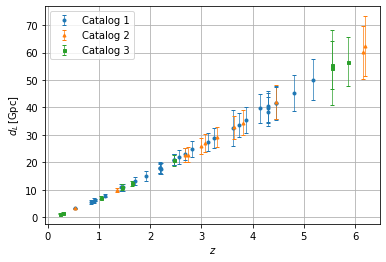

In [4]:
plt.errorbar(z_catalog1,dL_catalog1/1000,yerr=dL_catalog1*edL_catalog1/1000,fmt='o', ms =3,capsize=2,linewidth=0.7,label='Catalog 1')
plt.errorbar(z_catalog2,dL_catalog2/1000,yerr=dL_catalog2*edL_catalog2/1000,fmt='^', ms =3,capsize=2,linewidth=0.7,label='Catalog 2')
plt.errorbar(z_catalog3,dL_catalog3/1000,yerr=dL_catalog3*edL_catalog3/1000,fmt='s', ms =3,capsize=2,linewidth=0.7,label='Catalog 3')
plt.xlabel(r'$z$')
plt.ylabel(r'$d_L\,\mathrm{[Gpc]}$')
plt.grid(0.4)
plt.legend()

## Measuring distance in the universe

In order to measure distances in the universe one needs a standard reference to compare to, in the same way that when you want to measure your height you need a meter. For example, Supernova type IA provide this reference scale since their intrinsic luminosity $L$ is known (or at least we know how to calibrate it). Then, since the flux of energy $F$ scales inversely with the square of luminosity distance,
\begin{equation}
F= \frac{L}{4\pi d_L^2}\,.
\end{equation}
we can infer directly $d_L$ form the measurtement of $F$. SNIA are thus _standard sirens_.

In gravitational wave astronomy instead of measuring fluxes on gets directly the amplitude of the signal. Such amplitude (technically known as strain $h$) is inversely proportional to the luminosity distance
\begin{equation}
h\propto \mathcal{M_c}^{5/3}/ d_L\,,
\end{equation}
and depends also on the chirp mass, which is a combiantion of the component masses of the binary $\mathcal{M}_c=(m_1m_2)^{3/5}/(m_1+m_2)^{1/5}$. Since the masses can be obtained from the chirp of the signal, i.e. its frequency evolution, the GW amplitude provides a direct measurement of $d_L$. This is why GWs are _standard sirens_.

## Luminosity distance

The luminosity distance-redshift relation is determined by the cosmological model. For a universe with only matter and dark energy (good description for $z<10$), the luminosity distance is determined by
\begin{equation}
d_L(z)=(1+z)\int_0^z\frac{cdz}{H(z)}\,,
\end{equation}
where $c$ is the speed of light and the Hubble parameter, which measures the rate of expansion $H=\dot{a}/a$, follows
\begin{equation}
H(z)=H_0\sqrt{\Omega_M(1+z)^3+\Omega_\Lambda}\,.
\end{equation}
Here $\Omega_M$ and $\Omega_\Lambda$ are the present, fractional energy density of matter (dark matter + ordinary matter) and dark energy respectively. 

A nice reference describing the different distances in cosmology is [Hogg'99](https://arxiv.org/pdf/astro-ph/9905116.pdf).

_Note:_ for a universe with no curvature, $1=\Omega_M+\Omega_\Lambda$

_Note:_ if you like integrals and special mathematical functions, you can try to solve this one analytically. Explore! 

You can also play with this cosmology in [Mathematica](https://demonstrations.wolfram.com/CosmologyOfEinsteinDeSitterUniverse/) 

In [5]:
def c_Hz(z,H0,oM,oDE):
    #H0 in units of km/s/Mpc
    c = 3.0e5 # speed of light km/s
    return c/(H0*np.sqrt(oM*np.power(1+z,3)+oDE))

def dL_LCDM(z,H0,oM,oDE):
    return (1+z)*quad(c_Hz,0,z,args=(H0,oM,oDE))[0] #Mpc
dL_LCDM = np.vectorize(dL_LCDM)

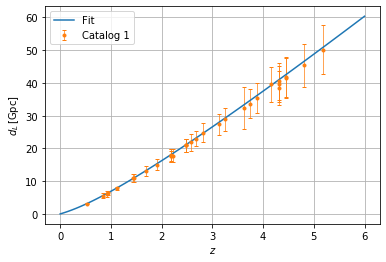

In [6]:
H0_guess = 67. # km/s/Mpc
oM_guess = 0.3 
oDE_guess = 0.7

zs = np.linspace(0,6,100)
dL_guess = dL_LCDM(zs,H0_guess,oM_guess,oDE_guess)/1000 # Gpc
#Plot
plt.plot(zs,dL_guess,label='Fit')
plt.errorbar(z_catalog1,dL_catalog1/1000,yerr=dL_catalog1*edL_catalog1/1000,fmt='o', ms =3,capsize=2,linewidth=0.7,label='Catalog 1')
plt.xlabel(r'$z$')
plt.ylabel(r'$d_L\,\mathrm{[Gpc]}$')
plt.grid(0.4)
plt.legend()
plt.show()

# Activity

Find the parameters $H_0$ and $\Omega_M$ (use that $\Omega_\Lambda = 1 - \Omega_M$) that best fit the data for each of the catalogs.

You can use either a visual fit, least squares, maximum likelihood estimation... Can you get how large is their uncertainty?

---

## How can you learn more about GWs?

The [GW-Open Science center](https://www.gw-openscience.org/about/) has a lot of great resources, including tutorials that will let you [discovery GWs on your own](https://www.gw-openscience.org/GW150914data/GW150914_tutorial.html).